## Import libraries and select the directory

In [1]:
#import numpy and panda libraries
import numpy as np 
import pandas as pd 
import time
from datetime import date
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
#import the model from sklearn
from sklearn import linear_model #algorithms and AI
#import evaluation metrics from sklearn
from sklearn.metrics import mean_squared_error, r2_score
#import TTsplit from sklearn
from sklearn.model_selection import train_test_split

## Read the files and show info

In [3]:
df=pd.read_csv('alldata.csv')

In [4]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [6]:
df.shape

(6964, 5)

## Detect missing values

In [7]:
df['reviews'].isna()

0        True
1        True
2        True
3       False
4       False
        ...  
6959    False
6960    False
6961    False
6962    False
6963    False
Name: reviews, Length: 6964, dtype: bool

In [8]:
df=df.dropna()

In [9]:
df.reset_index(drop=True, inplace=True)

## Value counts from position

In [10]:
#count the number of occurrences in position column
df['position'].value_counts(ascending=False)

Data Scientist                                            204
Senior Data Scientist                                      53
Research Analyst                                           44
Data Engineer                                              39
Machine Learning Engineer                                  26
                                                         ... 
Postdoctoral Scientist (Molecular Mechanism of Cancer)      1
Technical Manager                                           1
Senior Business Analyst                                     1
Associate Technical Sales Representative                    1
Principal Data Scientist, Deep Learning                     1
Name: position, Length: 4221, dtype: int64

In [11]:
#count the number of occurrences in company column
df['company'].value_counts(ascending=False)

Amazon.com            357
Ball Aerospace        187
Microsoft             137
Google                134
NYU Langone Health     76
                     ... 
Eurofins VRL, Inc.      1
DCS Corp                1
iHeartMedia, Inc.       1
Neustar, Inc.           1
Nexient                 1
Name: company, Length: 1302, dtype: int64

## Standardize header names and lower case the whole text


In [12]:
df.head()

,position,company,description,reviews,location
0,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
1,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
2,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
3,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
4,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"


In [13]:
df.columns.to_list()

['position', 'company', 'description', 'reviews', 'location']

In [14]:
def standardize_col(col):
    return col.lower().replace(" ","_")

In [15]:
new_cols=[]
for col in df.columns:
    new_cols.append(standardize_col(col))
new_cols

['position', 'company', 'description', 'reviews', 'location']

In [16]:
standardize_col("position")


'position'

In [17]:
df.columns=new_cols
df.columns

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

In [18]:
df = pd.concat([df[columns].astype(str).str.lower() 
           for columns in df.columns], axis=1)

In [19]:
df["position"].str.lower()

0                                            data analyst
1       assistant professor -tt - signal processing & ...
2                             manager of data engineering
3            product specialist - periscope, new ventures
4       junior to mid-level engineer, geologist or env...
                              ...                        
5321            data developer / machine learning analyst
5322                                          scientist i
5323                                     intern scientist
5324                      senior data & applied scientist
5325              principal data scientist, deep learning
Name: position, Length: 5326, dtype: object

In [20]:
df

,position,company,description,reviews,location
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,"atlanta, ga 30303"
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,"atlanta, ga"
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,"atlanta, ga 30318"
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,"atlanta, ga 30318"
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,"atlanta, ga"
...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,"sunnyvale, ca"
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,"sunnyvale, ca"
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"sunnyvale, ca"
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,"sunnyvale, ca"


## Create a new column based on if-else condition

- scien = Data Scienctist → 0
- analy  = Data Analyst → 1
- data eng = Data Engineer → 2
- machin = Machine learning engineer → 3
- archi = Data architect → 4

In [21]:
df.loc[df['position'].str.contains("data sci"),'roles'] = 'data_scientist'
df.loc[df['position'].str.contains("anal"),'roles'] = 'data_analyst'
df.loc[df['position'].str.contains("data eng"),'roles'] = 'data_engineer'
df.loc[df['position'].str.contains("machine learn"),'roles'] = 'machine_learning_engineer'
df.loc[df['position'].str.contains("data arch"),'roles'] = 'data_architect'

In [22]:
df

,position,company,description,reviews,location,roles
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,"atlanta, ga 30303",data_analyst
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,"atlanta, ga",machine_learning_engineer
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,"atlanta, ga 30318",data_engineer
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,"atlanta, ga 30318",NaN
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,"atlanta, ga",NaN
...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,"sunnyvale, ca",machine_learning_engineer
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,"sunnyvale, ca",NaN
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"sunnyvale, ca",NaN
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,"sunnyvale, ca",NaN


In [23]:
df = pd.concat([df[columns].astype(str).str.lower() 
           for columns in df.columns], axis=1)

In [24]:
df["roles"] = df["roles"].replace("nan","different_field")

In [25]:
df

,position,company,description,reviews,location,roles
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,"atlanta, ga 30303",data_analyst
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,"atlanta, ga",machine_learning_engineer
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,"atlanta, ga 30318",data_engineer
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,"atlanta, ga 30318",different_field
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,"atlanta, ga",different_field
...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,"sunnyvale, ca",machine_learning_engineer
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,"sunnyvale, ca",different_field
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"sunnyvale, ca",different_field
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,"sunnyvale, ca",different_field


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   position     5326 non-null   object
 1   company      5326 non-null   object
 2   description  5326 non-null   object
 3   reviews      5326 non-null   object
 4   location     5326 non-null   object
 5   roles        5326 non-null   object
dtypes: object(6)
memory usage: 249.8+ KB


## Create different Var for DATA ANALYSTS SKILLS

In [27]:
#a dictionary? #a new table? # a column with 0 and 1? 

In [28]:
#create a new df
df_skills = df

In [29]:
df_skills

,position,company,description,reviews,location,roles
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,"atlanta, ga 30303",data_analyst
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,"atlanta, ga",machine_learning_engineer
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,"atlanta, ga 30318",data_engineer
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,"atlanta, ga 30318",different_field
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,"atlanta, ga",different_field
...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,"sunnyvale, ca",machine_learning_engineer
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,"sunnyvale, ca",different_field
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"sunnyvale, ca",different_field
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,"sunnyvale, ca",different_field


Add programming languages columns

In [30]:
df_skills["python"] = df_skills["description"].str.contains("python")
df_skills["r"] = df_skills["description"].str.contains(" r ")
df_skills["sas"] = df_skills["description"].str.contains("sas")
df_skills["oracle"] = df_skills["description"].str.contains("oracle")
df_skills["java"] = df_skills["description"].str.contains("java")
df_skills["spark"] = df_skills["description"].str.contains("spark")
df_skills["tableau"] = df_skills["description"].str.contains("tableau")
df_skills["powerbi"] = df_skills["description"].str.contains("power bi")
df_skills["google_analytics"] = df_skills["description"].str.contains("google analytics")
df_skills["googcle_cloud"] = df_skills["description"].str.contains("googcle cloud")
df_skills["azure"] = df_skills["description"].str.contains("azure")
df_skills["aws"] = df_skills["description"].str.contains("aws")

In [31]:
df_skills["sql"] = df_skills["description"].str.contains("sql")
df_skills["dataviz"] = df_skills["description"].str.contains("data visualization")
df_skills["statistics"] = df_skills["description"].str.contains("statistics")
df_skills["excel"] = df_skills["description"].str.contains("excel")
df_skills["business_intelligence"] = df_skills["description"].str.contains("business intelligence")
df_skills["communication"] = df_skills["description"].str.contains("communication")
df_skills["machine_learning"] = df_skills["description"].str.contains("machine learning")
df_skills["teamwork"] = df_skills["description"].str.contains("teamwork")
df_skills["creativity"] = df_skills["description"].str.contains("creativity")
df_skills["problem_solving"] = df_skills["description"].str.contains("problem solving")
df_skills["storytelling"] = df_skills["description"].str.contains("storytelling")
df_skills["critical_thinking"] = df_skills["description"].str.contains("critical thinking")

In [32]:
df_skills["bachelor"] = df_skills["description"].str.contains("bachelor")
df_skills["masters"] = df_skills["description"].str.contains("masters")
df_skills["phd"] = df_skills["description"].str.contains("phd")

In [33]:
df_skills

,position,company,description,reviews,location,roles,python,r,sas,oracle,...,communication,machine_learning,teamwork,creativity,problem_solving,storytelling,critical_thinking,bachelor,masters,phd
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,"atlanta, ga 30303",data_analyst,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,"atlanta, ga",machine_learning_engineer,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,"atlanta, ga 30318",data_engineer,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,"atlanta, ga 30318",different_field,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,"atlanta, ga",different_field,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,"sunnyvale, ca",machine_learning_engineer,True,False,False,True,...,True,True,True,False,False,False,False,True,False,False
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,"sunnyvale, ca",different_field,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"sunnyvale, ca",different_field,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,"sunnyvale, ca",different_field,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False


<AxesSubplot:title={'center':'roles'}>

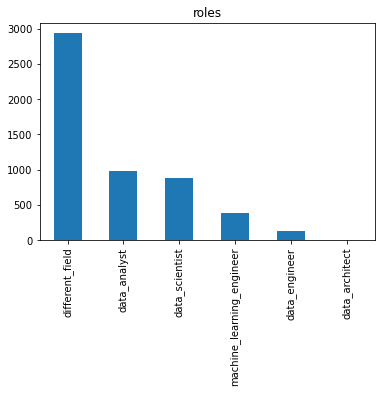

In [34]:
df_skills['roles'].value_counts().plot(kind='bar',title='roles') 

In [35]:
df_export = df_skills.drop(['description'], axis=1)

In [36]:
df_export.to_csv('df_export.csv',index=False)


## Filter data and store it in new vars 

In [37]:
da_filtered = df[df['roles'].eq('data_analyst')]
da_filtered

,position,company,description,reviews,location,roles,python,r,sas,oracle,...,communication,machine_learning,teamwork,creativity,problem_solving,storytelling,critical_thinking,bachelor,masters,phd
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,"atlanta, ga 30303",data_analyst,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,analyst - cib credit research,suntrust,works closely with senior cib professionals. p...,3343.0,"atlanta, ga",data_analyst,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7,statistical forecast analyst,the home depot,:\n\nthe statistical forecast analyst position...,38844.0,"atlanta, ga",data_analyst,False,False,False,False,...,True,False,False,False,True,False,True,True,True,False
11,business intelligence data science analyst - s...,newell brands,data science analyst– business intelligence\nl...,912.0,"atlanta, ga",data_analyst,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
26,scientist - data analysis,american cancer society,position description:\nsave lives. fulfill you...,959.0,"atlanta, ga",data_analyst,False,False,True,False,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,it r&d business system analyst ii,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,"sunnyvale, ca",data_analyst,False,False,True,True,...,True,False,False,False,True,False,False,True,False,False
5235,"director, commercial analytics","pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,"sunnyvale, ca",data_analyst,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
5240,platform engineer - predictive analytics platform,walmart ecommerce,position description\nwe are a team of data sc...,141.0,"sunnyvale, ca",data_analyst,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
5289,data scientist- growth analytics,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"sunnyvale, ca",data_analyst,True,False,False,False,...,True,True,False,True,False,False,False,False,False,False


In [38]:
ds_filtered = df[df['roles'].eq('data_scientist')]
ds_filtered

,position,company,description,reviews,location,roles,python,r,sas,oracle,...,communication,machine_learning,teamwork,creativity,problem_solving,storytelling,critical_thinking,bachelor,masters,phd
6,senior associate - cognitive data scientist na...,kpmg,known for being a great place to work and buil...,4494.0,"atlanta, ga 30338",data_scientist,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
9,"senior associate, data scientist",kpmg,innovate. collaborate. shine. lighthouse — kpm...,4494.0,"atlanta, ga 30338",data_scientist,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
12,data scientist,cotiviti,cotiviti is looking for an industry leading da...,104.0,"atlanta, ga",data_scientist,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
17,data scientist,norfolk southern corp,join a growing data science and advanced analy...,722.0,"atlanta, ga 30309",data_scientist,True,True,False,False,...,True,True,False,False,False,False,False,False,False,False
18,data scientist - supply chain,the home depot,position purpose:\na data scientist leverages ...,38844.0,"atlanta, ga",data_scientist,True,False,True,True,...,True,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,systems software performance data scientist su...,alibaba,we are the system performance team of alibaba ...,15.0,"sunnyvale, ca",data_scientist,True,False,False,False,...,True,True,False,False,False,False,False,False,False,True
5314,lead data scientist - nlp,target,description:\n\nabout this opportunity\njoin t...,33275.0,"sunnyvale, ca",data_scientist,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
5319,lead data scientist - haskell,target,description:\ntarget is looking for engineers ...,33275.0,"sunnyvale, ca",data_scientist,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5320,senior data scientist (gec11902),walmart,position description\nproficient in java or py...,148114.0,"sunnyvale, ca 94086",data_scientist,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [39]:
de_filtered = df[df['roles'].eq('data_engineer')]
de_filtered

,position,company,description,reviews,location,roles,python,r,sas,oracle,...,communication,machine_learning,teamwork,creativity,problem_solving,storytelling,critical_thinking,bachelor,masters,phd
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,"atlanta, ga 30318",data_engineer,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
49,data engineer,gallup,help gallup fulfill our mission of providing a...,140.0,"atlanta, ga",data_engineer,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
65,"data engineer - gc insights, new ventures",mckinsey & company,qualifications\nstrong academic qualifications...,385.0,"atlanta, ga 30318",data_engineer,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
73,"data engineer, scala",captech consulting,job description\n\nthe data engineer role fall...,14.0,"atlanta, ga",data_engineer,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
86,enterprise data analyst & data engineer,novelis,role overview\n\nnovelis is embarking on the j...,189.0,"atlanta, ga",data_engineer,True,False,True,False,...,False,True,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157,staff data engineer,walmart ecommerce,position description\nwe are part of search en...,141.0,"sunnyvale, ca",data_engineer,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5164,principal data engineer,target,description:\njoin the data science &amp; engi...,33275.0,"sunnyvale, ca",data_engineer,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5170,lead data engineer,target,description:\ndata science and engineering tea...,33275.0,"sunnyvale, ca",data_engineer,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5214,lead data engineer - devops sunnyvale,target,description:\njoin us as a lead data engineer ...,33275.0,"sunnyvale, ca",data_engineer,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
ml_filtered = df[df['roles'].eq('machine_learning_engineer')]
ml_filtered

,position,company,description,reviews,location,roles,python,r,sas,oracle,...,communication,machine_learning,teamwork,creativity,problem_solving,storytelling,critical_thinking,bachelor,masters,phd
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,"atlanta, ga",machine_learning_engineer,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
51,machine learning / artificial intelligence res...,symantec,(this is an individual contributor role)\n\nco...,950.0,"atlanta, ga 30338",machine_learning_engineer,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False
66,"technical evangelist – database, analytics, an...",amazon.com,job description\ndo you love data? do you like...,25907.0,"atlanta, ga",machine_learning_engineer,False,False,False,False,...,True,True,False,True,False,False,False,False,False,False
116,tech fall 2018 intern - machine learning,turner,the turner story\n\nturner is a division of ti...,375.0,"atlanta, ga 30319",machine_learning_engineer,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
117,r&d innovation engineer - video analytics/mach...,honeywell,"join a team recognized for leadership, innovat...",6121.0,"atlanta, ga 30308",machine_learning_engineer,True,False,False,False,...,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,"machine learning specialist, trust and safety",google,google's brand is only as strong as our users'...,2474.0,"sunnyvale, ca",machine_learning_engineer,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
5310,applied machine learning scientist,amazon.com,job description\nexternal job description\nama...,25907.0,"sunnyvale, ca",machine_learning_engineer,True,False,True,False,...,True,True,False,False,True,False,False,False,False,True
5315,"machine learning scientist, amazon alexa",amazon.com,job description\namazon is looking for a passi...,25907.0,"sunnyvale, ca",machine_learning_engineer,True,False,False,False,...,True,True,False,False,False,False,False,False,False,True
5318,"manager, machine learning",amazon.com,job description\nalexa is amazon's new cloud-b...,25907.0,"sunnyvale, ca",machine_learning_engineer,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True


In [41]:
darch_filtered = df[df['roles'].eq('data_architect')]
darch_filtered

,position,company,description,reviews,location,roles,python,r,sas,oracle,...,communication,machine_learning,teamwork,creativity,problem_solving,storytelling,critical_thinking,bachelor,masters,phd
972,manager data architects and database systems g...,massmutual,"since 1851, massmutual’s commitment has always...",786.0,"boston, ma 02298",data_architect,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2563,"data architect technical lead, ames",the aerospace corporation,"requisition id: 41481\nall locations: houston,...",82.0,"mountain view, ca 94035",data_architect,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2924,head of enterprise data architecture,marsh & mclennan companies,location: flexible; new york city preferred\n\...,537.0,"new york, ny",data_architect,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2941,data architect,businesses united technologies corp. headquarters,united technologies corporation (utc) has a de...,831.0,"new york, ny",data_architect,True,False,False,False,...,True,True,False,False,True,False,False,False,False,False
3121,data architect,movable ink,movable ink powers meaningful experiences in e...,4.0,"new york, ny",data_architect,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3426,senior data architect,microsoft,are you passionate about delivering the best u...,4618.0,"redmond, wa 98052",data_architect,True,False,False,False,...,True,True,False,False,False,False,False,True,False,True
4604,senior data architect,taulia,about taulia:\ntaulia delivers working capital...,3.0,"san francisco, ca 94104",data_architect,True,False,False,False,...,True,True,False,False,False,False,False,True,True,False
5022,data architect,metromile,about us\n\nmetromile is a start-up that is di...,7.0,"san francisco, ca",data_architect,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5204,chief data architect (disrupting a multi-billi...,jobspring partners,an autonomous subsidiary of one of the world’s...,27.0,"sunnyvale, ca",data_architect,True,False,False,False,...,True,True,False,True,False,False,False,False,False,True
